<a href="https://colab.research.google.com/github/ShaliniR8/Coursera-python-practice/blob/main/wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install PyDrive

In [ ]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
download = drive.CreateFile({'id': '1rfUBFMjDu4_1ZFv6AKIOJz9GJZMXnQ5G'})
download.GetContentFile('64050-0.tar')

In [ ]:
import tarfile
if not os.path.isdir('book'):
  os.mkdir('book/')

print(os.path.abspath('johncheap.tar'))
  


/content/johncheap.tar


In [ ]:
from zipfile import ZipFile 
with ZipFile('johncheap.zip', 'r') as zip: 
    # printing all the contents of the zip file 
    zip.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall('./book') 
    print('Done!') 


File Name                                             Modified             Size
64050-0.txt                                    2020-12-15 06:04:40       638458
Extracting all the files now...
Done!


In [66]:
import io
def extract_content():
  f = io.open('book/64050-0.txt', mode = 'r', encoding='utf-8')
  content = f.read()
  return content
  

In [74]:
contents = extract_content()
contents

'The Project Gutenberg EBook of John Cheap, the Chapman\'s Library. Vol. 2:\nReligious and Scriptural., by John Cheap\n\nThis eBook is for the use of anyone anywhere in the United States and\nmost other parts of the world at no cost and with almost no restrictions\nwhatsoever. You may copy it, give it away or re-use it under the terms\nof the Project Gutenberg License included with this eBook or online at\nwww.gutenberg.org. If you are not located in the United States, you\nwill have to check the laws of the country where you are located before\nusing this ebook.\n\nTitle: John Cheap, the Chapman\'s Library. Vol. 2: Religious and\n       Scriptural.\n       The Scottish Chap Literature of Last Century Classified\n\nCompiler: John Cheap\n\nRelease Date: December 15, 2020 [EBook #64050]\n\nLanguage: English\n\nCharacter set encoding: UTF-8\n\nProduced by: hekula03, John Campbell and the Online Distributed\n             Proofreading Team at https://www.pgdp.net (This book was\n           

In [118]:
def preprocess():
  contents = extract_content()
  punctuations = '''!()-[]{};:'"\,<>./?@‘’“”#$%^&*_~"'''
  common_words = ["for","the", "a", "to", "if", "is", "in", "it", "of", "and", "or","on", "an", "as", "i", "me", "my", \
  "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
  "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
  "so","have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
  "all", "any", "both", "each", "few", "more", "some", "such", "no", "not", "nor", "too", "very", "can", "will", "just"]

  #remove possession (apostrophe)
  contents = contents.replace('’s',' ')
  contents = contents.replace('’S', ' ')
  
  #remove punctuations
  for p in punctuations:
    contents = contents.replace(p,' ')

  contents = contents.lower()

  #count frequency
  frequency = {}
  for word in contents.split():
    #remove common words
    if word not in common_words and len(word)>1:
      frequency[word] = frequency.get(word,0) + 1
    
  return frequency


In [116]:
#!pip install wordcloud
import wordcloud 

def get_cloud():
  frequency = preprocess()
  print(frequency)
  wc = wordcloud.WordCloud()
  wc.generate_from_frequencies(frequency)
  return wc.to_array()



{'project': 87, 'gutenberg': 97, 'ebook': 12, 'john': 72, 'cheap': 7, 'chapman': 5, 'library': 8, 'vol': 4, 'religious': 12, 'scriptural': 6, 'use': 49, 'anyone': 5, 'anywhere': 2, 'united': 19, 'states': 19, 'most': 116, 'other': 146, 'parts': 14, 'world': 79, 'cost': 9, 'almost': 17, 'restrictions': 2, 'whatsoever': 11, 'may': 268, 'copy': 12, 'give': 100, 'away': 82, 'under': 89, 'terms': 27, 'license': 16, 'included': 4, 'online': 5, 'www': 11, 'org': 11, 'located': 7, 'check': 6, 'laws': 30, 'country': 51, 'before': 225, 'using': 7, 'title': 3, 'scottish': 6, 'chap': 8, 'literature': 2, 'last': 70, 'century': 2, 'classified': 2, 'compiler': 1, 'release': 2, 'date': 5, 'december': 3, '2020': 1, '64050': 4, 'language': 11, 'english': 9, 'character': 10, 'set': 60, 'encoding': 1, 'utf': 1, 'produced': 6, 'hekula03': 1, 'campbell': 2, 'distributed': 5, 'proofreading': 1, 'team': 2, 'https': 2, 'pgdp': 1, 'net': 1, 'book': 24, 'images': 3, 'made': 172, 'available': 3, 'hathitrust': 1, 

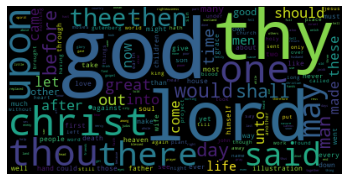

In [117]:
#display
import matplotlib.pyplot as plt

array = get_cloud()
plt.imshow(array)
plt.axis('off')
plt.show()